In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('energydata_complete.csv')

In [3]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [23]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [155]:
# Doing MinMax scaling for Normalization
# Dropping lights and date columns
df_new = df.drop(columns=['lights','date'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new = pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)
feat = df_new.drop(columns=['T2'])
df2 = df_new['T2']
ft = df_new['T6']
df2

0        0.225345
1        0.225345
2        0.225345
3        0.225345
4        0.225345
           ...   
19730    0.711655
19731    0.701769
19732    0.692651
19733    0.677054
19734    0.666171
Name: T2, Length: 19735, dtype: float64

In [156]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feat, df2, test_size=0.3, random_state=1)

In [157]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
pred_val = linear_model.predict(x_test)

In [158]:
ds=linear_model.fit(x_train,y_train).coef_
ds.mean()

0.02124284889994247

In [159]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,pred_val)
round(r2_score, 2)

0.96

In [160]:
from sklearn.metrics import mean_absolute_error
r =  mean_absolute_error(y_test,pred_val)
round(r, 2)

0.02

In [161]:
res =  np.sum(np.square(y_test-pred_val))
round(res, 2)

5.29

In [100]:
from sklearn.metrics import mean_squared_error
rf =  np.sqrt(mean_squared_error(y_test,pred_val))
round(rf, 2)

0.0

In [162]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
r=ridge_reg.fit(x_train,y_train).coef_
r

array([-2.56105982e-02,  4.85390791e-01,  6.22078129e-01, -9.98041341e-01,
       -3.15777444e-02,  1.02700479e-01,  8.87354530e-02,  1.63456792e-01,
        2.22426319e-02,  1.47927849e-02,  3.01678456e-01,  1.38074199e-03,
       -6.19953214e-02,  4.33992201e-02, -1.98658563e-02, -4.21052231e-02,
        1.21671347e-01,  8.86743036e-03, -2.05330270e-01, -3.79288877e-05,
       -1.58347046e-02, -1.77600377e-02,  3.17607744e-03,  2.16365123e-02,
       -1.53742812e-05, -1.53742812e-05])

In [163]:
from sklearn.linear_model import Lasso
rid_reg = Lasso(alpha=0.001)
#rt=rid_reg.fit(x_train,y_train).coef_
#rt
me=rid_reg.fit(x_train,y_train)
pred3=me.predict(x_test)
ruf = np.sqrt(mean_squared_error(y_test,pred3))
ruf

0.044400661292167666

In [164]:
def get_weights(mod,f,c):
    weights=pd.Series(mod.coef_, f.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns=['Features', c]
    weights_df[c].round(3)
    return weights_df

linear=get_weights(linear_model,x_train,'Linear_model')
ridge_weights=get_weights(ridge_reg,x_train,'Ridge')
lasso_weights=get_weights(rid_reg,x_train,'Lasso')
fn=pd.merge(linear,ridge_weights, on='Features')
fn2=pd.merge(fn,lasso_weights, on='Features')

In [165]:
fn2

,Features,Linear_model,Ridge,Lasso
0,RH_2,-1.020176,-0.998041,-0.473257
1,T_out,-0.251023,-0.205330,0.000000
2,T7,-0.062999,-0.061995,0.000000
3,RH_8,-0.041252,-0.042105,0.000000
4,T3,-0.034320,-0.031578,0.000000
5,RH_out,-0.033616,-0.015835,-0.007688
6,Appliances,-0.027827,-0.025611,0.000000
7,T8,-0.019726,-0.019866,-0.000000
8,Windspeed,-0.018009,-0.017760,-0.000000
9,rv1,-0.000028,-0.000015,0.000000


In [166]:
fy=pd.DataFrame(df['T6'])
fx=pd.DataFrame(df['T2'])
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(fx,fy)
#l.coef_
linear_model.coef_

array([[2.22506139]])

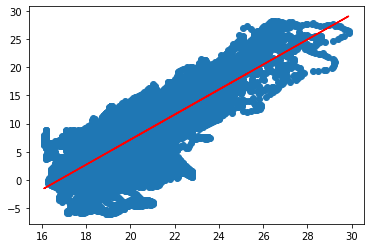

In [147]:
predi=linear_model.predict(fx)
plt.scatter(fx,fy)
plt.plot(fx,predi,color='red')
plt.show()